In [3]:
import zipfile

with zipfile.ZipFile('/content/new-plant-diseases-dataset.zip') as zp:
  zp.extractall('/content/')

In [4]:
import torch
from torchvision import transforms
import torchvision
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32,32))
])

In [6]:
train_data = torchvision.datasets.ImageFolder('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train', transform=transform)

In [7]:
train_data

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [8]:
train_data.class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [9]:
test_data = torchvision.datasets.ImageFolder('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid', transform=transform)

In [10]:
test_data

Dataset ImageFolder
    Number of datapoints: 17572
    Root location: /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [11]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

In [28]:
sample = (next(iter(train_loader))[0][0]).permute((1,2,0))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [22]:
sample.shape

torch.Size([32, 32, 3])

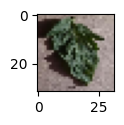

In [29]:
plt.figure(figsize=(1,1))
plt.imshow(sample)

In [30]:
import os

train_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [31]:
train_data.class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [33]:
healthy =[]
diseases = []

for d in os.listdir(train_path):
  temp = d.split('___')
  if 'healthy' in temp:
    healthy.append(d)
  else:
    diseases.append(d)


In [37]:
len(healthy)

12

In [36]:
len(diseases)

26

In [38]:
count = dict()

for d in os.listdir(train_path):
  count[d] = len(os.listdir(train_path+'/'+d))

In [39]:
count

{'Tomato___Leaf_Mold': 1882,
 'Apple___Cedar_apple_rust': 1760,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722,
 'Tomato___Early_blight': 1920,
 'Strawberry___Leaf_scorch': 1774,
 'Tomato___Late_blight': 1851,
 'Pepper,_bell___healthy': 1988,
 'Tomato___Bacterial_spot': 1702,
 'Orange___Haunglongbing_(Citrus_greening)': 2010,
 'Tomato___Spider_mites Two-spotted_spider_mite': 1741,
 'Apple___Apple_scab': 2016,
 'Tomato___healthy': 1926,
 'Tomato___Tomato_mosaic_virus': 1790,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642,
 'Potato___Late_blight': 1939,
 'Raspberry___healthy': 1781,
 'Grape___Esca_(Black_Measles)': 1920,
 'Strawberry___healthy': 1824,
 'Grape___healthy': 1692,
 'Cherry_(including_sour)___healthy': 1826,
 'Tomato___Target_Spot': 1827,
 'Peach___Bacterial_spot': 1838,
 'Pepper,_bell___Bacterial_spot': 1913,
 'Blueberry___healthy': 1816,
 'Peach___healthy': 1728,
 'Tomato___Septoria_leaf_spot': 1745,
 'Squash___Powdery_mildew': 1736,
 'Corn_(maize)___Commo

In [41]:
count_df = pd.DataFrame(count.values(), index=count.keys(), columns=['no of images'])

In [42]:
count_df

,no of images
Tomato___Leaf_Mold,1882
Apple___Cedar_apple_rust,1760
Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1722
Tomato___Early_blight,1920
Strawberry___Leaf_scorch,1774
Tomato___Late_blight,1851
"Pepper,_bell___healthy",1988
Tomato___Bacterial_spot,1702
Orange___Haunglongbing_(Citrus_greening),2010
Tomato___Spider_mites Two-spotted_spider_mite,1741


In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [44]:
device

'cuda'

In [47]:
c =0
for x in train_loader:
  c+=1
  x[0].to(device)
  x[1].to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [48]:
c

2197

In [51]:
70295/32

2196.71875

In [65]:
from torch import nn
class CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels=128, kernel_size=3, padding=1),
        nn.LeakyReLU(inplace=True),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2)
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels = 128, out_channels=256, kernel_size=3, padding=1),
        nn.LeakyReLU(inplace=True),
        nn.BatchNorm2d(256),
        nn.MaxPool2d(kernel_size=2)
    )

    self.block3 = nn.Sequential(
        nn.Conv2d(in_channels = 256, out_channels=512, kernel_size=3, padding=1),
        nn.LeakyReLU(inplace=True),
        nn.BatchNorm2d(512),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classify = nn.Sequential(
        nn.Dropout(0.2),
        nn.Flatten(),
        nn.Linear(in_features=512*4*4, out_features=512),
        nn.LeakyReLU(inplace=True),
        nn.Linear(in_features=512, out_features=38)
    )

  def forward(self, x):
    x1 = self.block1(x)
    x2 = self.block2(x1)
    x3 = self.block3(x2)
    x4 = self.classify(x3)
    return x4





In [66]:
model = CNN().to(device)

In [67]:
loss = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model.parameters(), lr=3e-4)
epochs = 5

In [60]:
3e-4

0.0003

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
model.to(device)

for epoch in range(epochs):
  for b, (feature, target) in enumerate(train_loader):
    feature = feature.to(device)
    target = target.to(device)

    model.train()

    pred = model(feature)

    loss_fn = loss(pred.squeeze(), target)

    optim.zero_grad()

    loss_fn.backward()

    optim.step()

  model.eval()
  all_preds = []
  all_targets = []

  with torch.inference_mode():
    for feature_val, target_val in test_loader:
      feature_val = feature_val.to(device)
      target_val = target_val.to(device)

      pred_val = model(feature_val)
      loss_val = loss(pred_val.squeeze(), target_val)

      all_preds.extend(torch.argmax(torch.softmax(pred_val, dim=1), dim=1).cpu().numpy())
      all_targets.extend(target_val.cpu().numpy())

  accuracy = accuracy_score(all_targets, all_preds)
  print(f"Epoch {epoch} | Loss on Training : {loss_fn.item()} | Accuracy on testing {accuracy}")





/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 0 | Loss on Training : 0.20608682930469513 | Accuracy on testing 0.8890279990894605


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 | Loss on Training : 0.11216391623020172 | Accuracy on testing 0.9381971318005918


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 2 | Loss on Training : 0.011271975934505463 | Accuracy on testing 0.9555542909173685


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 3 | Loss on Training : 0.12638652324676514 | Accuracy on testing 0.9528795811518325


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 4 | Loss on Training : 0.022343430668115616 | Accuracy on testing 0.9524243114045071


In [71]:
testing = next(iter(test_loader))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [72]:
f = testing[0][0]
t = testing[1][0]

In [73]:
t

tensor(18)

In [74]:
test_data.class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [75]:
output = model(f.unsqueeze(dim=0).to(device))

In [76]:
output.shape

torch.Size([1, 38])

In [78]:
torch.argmax(torch.softmax(output, dim=1))

tensor(18, device='cuda:0')

In [64]:
512*4*4

8192

In [79]:
model.eval()
all_preds = []
all_targets = []

with torch.inference_mode():
  for feature_val, target_val in test_loader:
    feature_val = feature_val.to(device)
    target_val = target_val.to(device)

    pred_val = model(feature_val)
    loss_val = loss(pred_val.squeeze(), target_val)

    all_preds.extend(torch.argmax(torch.softmax(pred_val, dim=1), dim=1).cpu().numpy())
    all_targets.extend(target_val.cpu().numpy())

accuracy = accuracy_score(all_targets, all_preds)
confusion_m = confusion_matrix(all_targets, all_preds)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [80]:
accuracy*100

95.2424311404507

<Axes: >

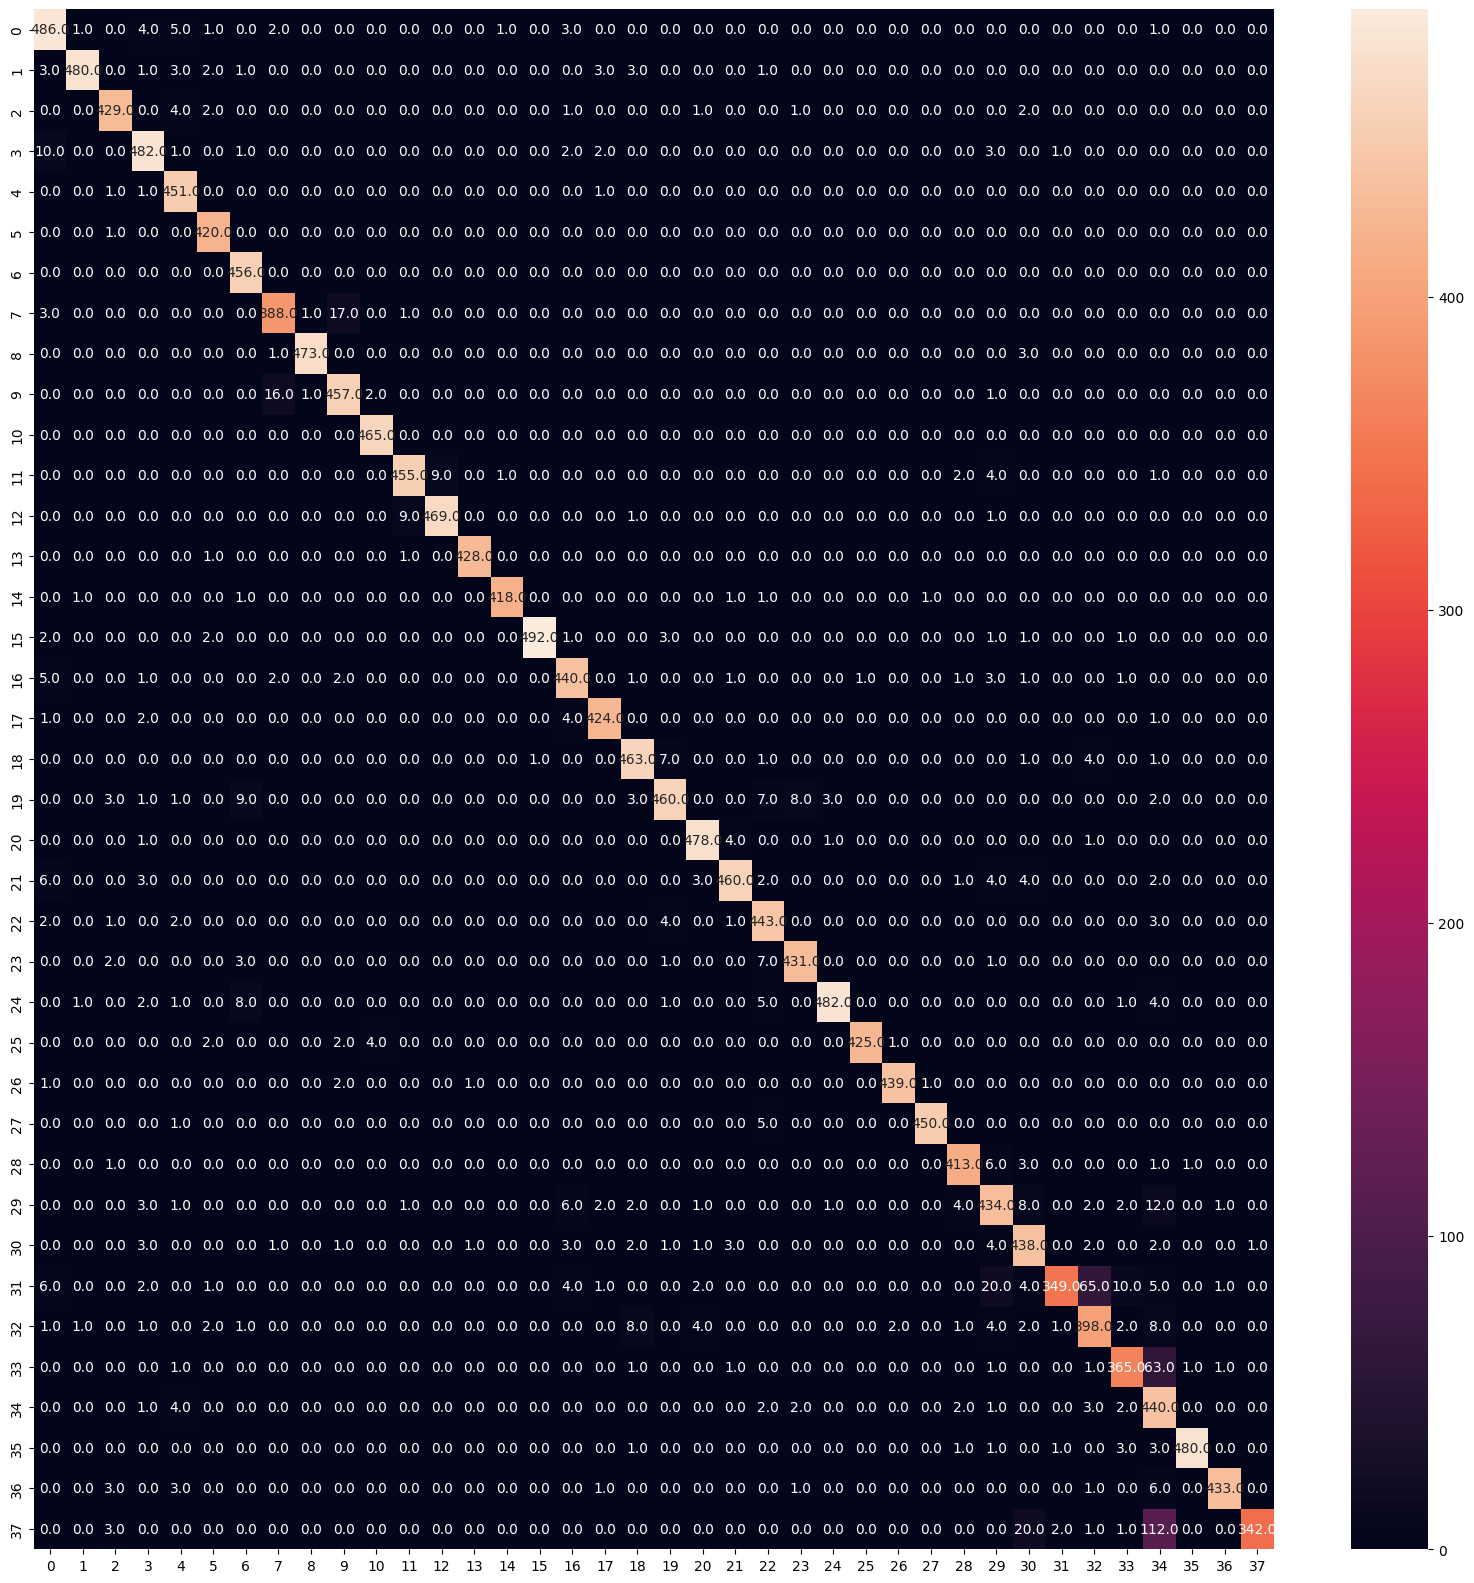

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_m, annot=True, fmt='.1f')